In [1]:
!pip install yfinance
!pip install mplfinance

# Ta-Lib suite of financial data indicators

Colab installation process: 1.


1. Execute the phase - change the type of execution phase - software gas pedal, select GPU (faster with GPU, or without) 2.

2. Run the following program to install

In [7]:
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
#!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd ta-lib
#!./configure --prefix=/usr
#!make
#!make install
#!pip install Ta-Lib

In [1]:
#Data analysis and processing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #Chart Drawing Kit
import datetime #Time Processing Suite
import talib
import mplfinance as mpf

#WebCrawler
import pandas_datareader.data as web
import yfinance as yf  #Yahoo Finance

#Data normalization 
from sklearn.preprocessing import MinMaxScaler  

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping


from math import sqrt
from keras.utils.vis_utils import plot_model   # plot_model 
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Stock Market Data Crawler

* Make sure the yfinance suite is installed [https://pypi.org/project/yfinance/ ] 

```
! pip install yfnance
```

＊ Go to Yahoo Finance and confirm the stock code [https://finance.yahoo.com/ ] 

In [3]:
start = datetime.datetime(2018,4,1) # Set start time
end = datetime.datetime(2021,7,30) # Set the end time
df = yf.download('0050.TW', start, end) 
#df  = yf.download('0050.TW', start = '2018-04-01', end = '2021-07-30') 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,82.849998,82.949997,82.150002,82.250000,82.250000,3737299
2018-04-03,81.500000,81.550003,81.199997,81.500000,81.500000,6187523
2018-04-09,82.150002,82.300003,81.599998,82.199997,82.199997,3401430
2018-04-10,82.099998,82.849998,81.750000,82.500000,82.500000,3860497
2018-04-11,82.900002,83.099998,82.750000,82.849998,82.849998,2603653
...,...,...,...,...,...,...
2021-07-23,138.050003,138.300003,137.350006,137.649994,137.649994,3093560
2021-07-26,137.750000,138.050003,136.250000,136.449997,136.449997,11587727
2021-07-27,136.500000,137.050003,136.050003,136.399994,136.399994,10316297


In [4]:
df2 = yf.download('0050.TW',period='60d',interval='1d') # Specify data collection up to 60 days, frequency is one day
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-07,113.099998,113.150002,112.099998,112.199997,112.199997,15488892
2022-09-08,113.050003,113.050003,112.400002,113.000000,113.000000,7117171
2022-09-12,115.300003,115.650002,115.000000,115.400002,115.400002,7545318
2022-09-13,116.099998,116.400002,115.750000,116.000000,116.000000,4540486
2022-09-14,113.050003,113.949997,112.800003,113.650002,113.650002,10945566
2022-09-15,113.500000,114.250000,113.199997,113.849998,113.849998,3684100
2022-09-16,112.650002,112.849998,112.300003,112.550003,112.550003,12950907
2022-09-19,112.949997,112.949997,111.900002,112.050003,112.050003,7177318
2022-09-20,112.550003,113.150002,112.250000,113.050003,113.050003,5757206


In [5]:
df3 = yf.download('0050.TW',period='1mo',interval='1d') # Specify data collected up to 1 month ago (1mo), frequency is one day
df3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,98.849998,99.949997,98.800003,99.599998,99.599998,8194304
2022-11-02,99.599998,100.050003,99.400002,100.000000,100.000000,7005305
2022-11-03,98.500000,98.849998,98.349998,98.699997,98.699997,13533114
2022-11-04,98.099998,98.949997,97.500000,98.849998,98.849998,6432535
2022-11-07,99.800003,100.849998,99.550003,100.550003,100.550003,12106536
2022-11-08,101.449997,101.949997,101.250000,101.599998,101.599998,10406422
2022-11-09,102.550003,104.500000,102.550003,104.500000,104.500000,18911329
2022-11-10,103.449997,103.849998,103.199997,103.500000,103.500000,14732904
2022-11-11,108.550003,109.000000,107.800003,109.000000,109.000000,34312389


In [6]:
df4 = yf.download('0050.TW',period='3d',interval='1m') # Specify data collected up to three days ago (3d), at a frequency of one minute

df4

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-29 09:00:00,113.849998,113.849998,113.500000,113.550003,113.550003,0
2022-11-29 09:01:00,113.599998,113.599998,113.349998,113.400002,113.400002,141000
2022-11-29 09:02:00,113.400002,113.400002,113.349998,113.400002,113.400002,91000
2022-11-29 09:03:00,113.349998,113.500000,113.349998,113.449997,113.449997,74000
2022-11-29 09:04:00,113.449997,113.500000,113.250000,113.300003,113.300003,124000
...,...,...,...,...,...,...
2022-12-01 13:21:00,118.349998,118.349998,118.349998,118.349998,118.349998,6000
2022-12-01 13:22:00,118.349998,118.349998,118.300003,118.349998,118.349998,66344
2022-12-01 13:23:00,118.349998,118.349998,118.300003,118.349998,118.349998,27000


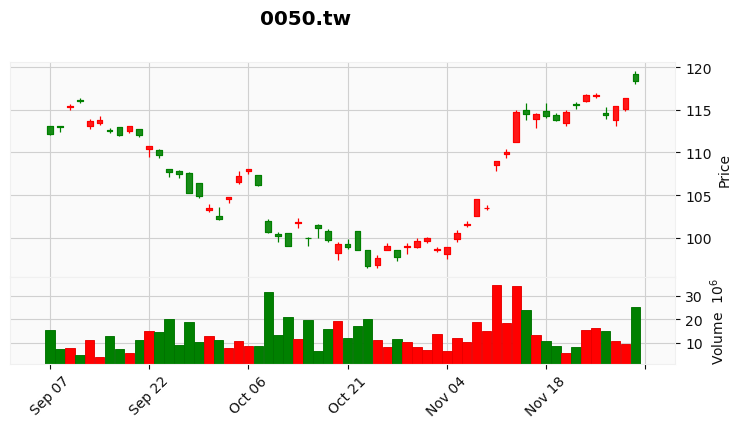

In [7]:
#Draw K-line chart
mc = mpf.make_marketcolors(up='r', down='g', inherit=True) #Customize chart appearance and set k-line chart colors
exterior = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc) #Save the chart appearance

#For detailed settings, please refer to [https://pypi.org/project/mplfinance/]
#volume controls whether prices are displayed below
k_plot = mpf.plot(df2, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=0.75, title='0050.tw',)

# Ta-Lib Implementation

＊View category function [ http://mrjbq7.github.io/ta-lib/doc_index.html ]



```
# You can print(function_list) to see all functions
function_list= talib.get_function_groups()
# View function categories
function_list.keys()
```



In [8]:
#Parameter setting: timeperiod: the number of days parameter, you can freely set the number of days, the default is 14

_adx = talib.ADX(df.High, df.Low, df.Close, timeperiod = 7)

_rsi = talib.RSI(df.Close,  timeperiod = 7)

_dema = talib.DEMA(df.Close, timeperiod=30)

In [9]:
# Average Directional Index (ADX)
# ADX above 30 means the price has entered a trend. And below 30 means that the exchange rate is fluctuating within the range. When the ADX exceeds 30, the larger the reading of the ADX, the more pronounced the price trend.
_adx

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    23.930631
2021-07-26    25.923251
2021-07-27    27.981423
2021-07-28    32.696474
2021-07-29    34.881715
Length: 810, dtype: float64

In [10]:
# Relative Strength Index (RSI)
# The value calculated from the average increase and average decrease of a stock price, which is an indicator of the strength or weakness of a stock price during the observation period.
# RSI = (average up/(average up + average down)) x 100
_rsi 

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    43.052091
2021-07-26    34.833045
2021-07-27    34.512735
2021-07-28    23.618134
2021-07-29    44.866997
Length: 810, dtype: float64

In [11]:
# Double Exponential Moving Average (DEMA)
# DEMA = 2 * N-Day EMA - EMA of N-Day EMA 
_dema 

Date
2018-04-02           NaN
2018-04-03           NaN
2018-04-09           NaN
2018-04-10           NaN
2018-04-11           NaN
                 ...    
2021-07-23    138.904710
2021-07-26    138.651695
2021-07-27    138.414866
2021-07-28    137.930754
2021-07-29    137.772730
Length: 810, dtype: float64

## Data Processing

In [12]:
# axis = 0 for Down , axis = 1 for across
# inplace = True means operate directly from the DataFrame 
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 

In [13]:
df

,Close
Date,
2018-04-02,82.250000
2018-04-03,81.500000
2018-04-09,82.199997
2018-04-10,82.500000
2018-04-11,82.849998
...,...
2021-07-23,137.649994
2021-07-26,136.449997
2021-07-27,136.399994


Q : Diviser le dataset df en 80% d'entrainement et 20% de test 

In [14]:
split_point = int(len(df)*0.8)
train = df.iloc[:split_point].copy()
test = df.iloc[split_point:].copy()

# You can also cut by date
'''
split_date = pd.Timestamp('2020-11-26') #Taiwan's entire country is on Level 3 alert
train = df.loc[:split_date]
test1 = df.loc[split_date:]
'''

"\nsplit_date = pd.Timestamp('2020-11-26') #Taiwan's entire country is on Level 3 alert\ntrain = df.loc[:split_date]\ntest1 = df.loc[split_date:]\n"

In [15]:
# Data normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

#If the data is not one-dimensional, we need to reshape the data and adjust it to (data length,1) 

train_set= train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train_set)

test_set= test.values.reshape(-1,1)
test_sc = scaler.fit_transform(test_set)


In [16]:
predict_days = 1 
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]
X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [17]:
#Verify the shape of the dataset, it's important! 
#You can tell others the size of the training set and the dataset
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(647, 1, 1) (647, 1) (161, 1, 1) (161, 1)


# Build the model

Model fit tunable parameters.

epochs (iterations): number of training sessions 


batch_size: how many data are entered at a time  


verbose (progress bar mode): 0, 1, 2 modes to choose from


callbacks (callback function): refer to this page [https://keras.io/zh/callbacks/]

In [18]:
# Build LSTM model
lstm_model = Sequential()

#LSTM : neurons (units) 
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1],1)))

# Forgetting layer : Dropout forgetting rate can be adjusted
lstm_model.add(Dropout(0.2))

# Output layer : Number of output data
lstm_model.add(Dense(1))

#loss : Loss function
#optimizer : Optimizer
#metrics : Evaluation metrics
#The rest of the function settings can be found at [ https://www.tensorflow.org/api_docs/python/tf/keras/Model ]

lstm_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

#Use EarlyStopping to avoid wasting time
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history_lstm_model = lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, shuffle=True, callbacks=[early_stop])


Epoch 1/20
647/647 - 3s - loss: 0.0425 - accuracy: 0.0031 - 3s/epoch - 5ms/step
Epoch 2/20
647/647 - 1s - loss: 0.0036 - accuracy: 0.0031 - 1s/epoch - 2ms/step
Epoch 3/20
647/647 - 1s - loss: 0.0034 - accuracy: 0.0031 - 1s/epoch - 2ms/step
Epoch 4/20
647/647 - 2s - loss: 0.0033 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 5/20
647/647 - 2s - loss: 0.0035 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 6/20
647/647 - 2s - loss: 0.0034 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 6: early stopping


# Model training visualization

In [19]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


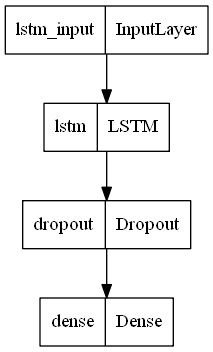

In [20]:
plot_model(lstm_model, 'model.png')

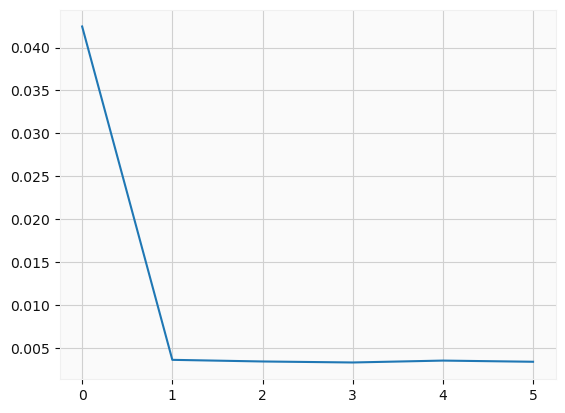

In [21]:
plt.plot(history_lstm_model.history['loss'])

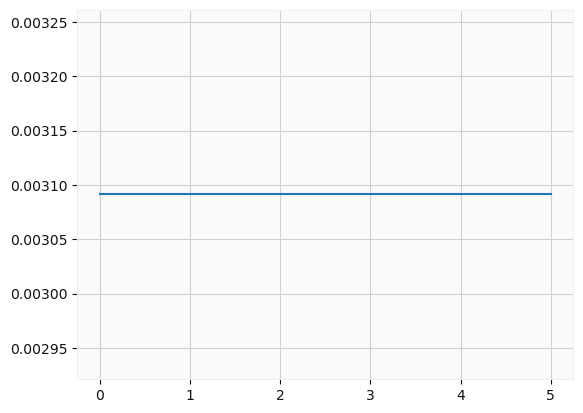

In [22]:
plt.plot(history_lstm_model.history['accuracy'])

# Model Prediction


6/6 [==============================] - 2s 4ms/step


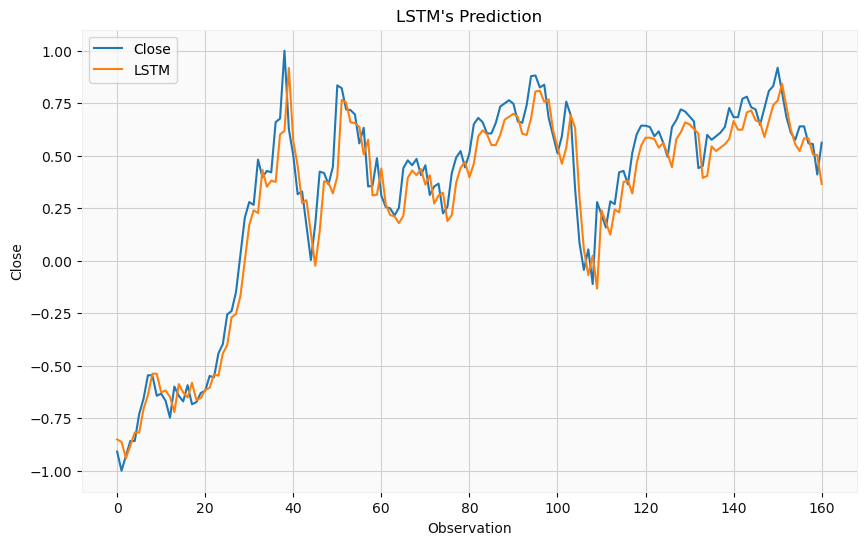

In [23]:
y_pred_test_lstm = lstm_model.predict(X_test) #Predict
plt.figure(figsize=(10, 6))
plt.plot(y_test[:,0], label='Close')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close')
plt.legend()
plt.show();

In [24]:
#Restore the normalized data
reduction_Lstm_pred = scaler.inverse_transform(y_pred_test_lstm)
reduction_test = df.iloc[split_point:].copy()
reduction_y_test = reduction_test[predict_days:]

In [25]:
#Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(reduction_y_test, reduction_Lstm_pred))
print('Mean Squared Error:', mean_squared_error(reduction_y_test, reduction_Lstm_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(reduction_y_test, reduction_Lstm_pred)))
print("Coefficient of Determination:", r2_score(reduction_y_test, reduction_Lstm_pred))

Mean Absolute Error: 1.3875342896266014
Mean Squared Error: 3.312901414564221
Root Mean Squared Error: 1.820137746041277
Coefficient of Determination: 0.9358997313208098
